<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reinforcement-Learning---Dynamic-Programming" data-toc-modified-id="Reinforcement-Learning---Dynamic-Programming-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reinforcement Learning - Dynamic Programming</a></span><ul class="toc-item"><li><span><a href="#1.-Policy-Evaluation-(1-point)" data-toc-modified-id="1.-Policy-Evaluation-(1-point)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Policy Evaluation (1 point)</a></span></li><li><span><a href="#2.-Policy-Iteration-(2-points)" data-toc-modified-id="2.-Policy-Iteration-(2-points)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Policy Iteration (2 points)</a></span></li><li><span><a href="#3.-Q-value-Iteration-(3-points)" data-toc-modified-id="3.-Q-value-Iteration-(3-points)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Q-value Iteration (3 points)</a></span></li></ul></li></ul></div>

# Reinforcement Learning - Dynamic Programming
If you want to test/submit your solution **restart the kernel, run all cells and submit the dp_autograde.py file into codegrade.**

In [1]:
# This cell imports %%execwritefile command (executes cell and writes it into file). 
# All cells that start with %%execwritefile should be in dp_autograde.py file after running all cells.
from custommagics import CustomMagics
get_ipython().register_magics(CustomMagics)

In [2]:
%%execwritefile dp_autograde.py
import numpy as np
from collections import defaultdict

Overwriting dp_autograde.py


In [3]:
import matplotlib.pyplot as plt
import sys

%matplotlib inline

assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

## 1. Policy Evaluation (1 point)
In this exercise we will evaluate a policy, e.g. find the value function of a policy. The problem we consider is the gridworld from Example 4.1 in the book. The environment is implemented as `GridworldEnv`, which is a subclass of the `Env` class from [OpenAI Gym](https://github.com/openai/gym). This means that we can interact with the environment. We can look at the documentation to see how we can interact with the environment.

In [4]:
from gridworld import GridworldEnv
env = GridworldEnv()
# Lets see what this is

In [5]:
# To have a quick look into the code
# ?env
# ??env

Now we want to evaluate a policy by using Dynamic Programming. For more information, see the [Intro to RL](https://drive.google.com/open?id=1opPSz5AZ_kVa1uWOdOiveNiBFiEOHjkG) book, section 4.1. This algorithm requires knowledge of the problem dynamics in the form of the transition probabilities $p(s',r|s,a)$. In general these are not available, but for our gridworld we know the dynamics and these can be accessed as `env.P`. Note that we do not need to use a discount_factor for episodic tasks but make sure your implementation can handle this correctly!

In [6]:
# Take a moment to figure out what P represents. 
# Note that this is a deterministic environment. 
# What would a stochastic environment look like?
env.P

{0: {0: [(1.0, 0, 0.0, True)],
  1: [(1.0, 0, 0.0, True)],
  2: [(1.0, 0, 0.0, True)],
  3: [(1.0, 0, 0.0, True)]},
 1: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 2, -1.0, False)],
  2: [(1.0, 5, -1.0, False)],
  3: [(1.0, 0, -1.0, True)]},
 2: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 6, -1.0, False)],
  3: [(1.0, 1, -1.0, False)]},
 3: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 7, -1.0, False)],
  3: [(1.0, 2, -1.0, False)]},
 4: {0: [(1.0, 0, -1.0, True)],
  1: [(1.0, 5, -1.0, False)],
  2: [(1.0, 8, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 5: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 6, -1.0, False)],
  2: [(1.0, 9, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 6: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 10, -1.0, False)],
  3: [(1.0, 5, -1.0, False)]},
 7: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 11, -1.0, False)],
  3: [(1.0, 6, -1.0, False)]},
 8: {0: [(1.0, 4

In [7]:
# env.P describes the possible actions for each state, 0, 1, 2, 3 denotes 4 actions (up, right,
# down, left), for state 14, with action 0 (up), 0: [(1.0, 10, -1.0, False)], this shows the prob.
# of transition is 1.0, the next sate s' is 10, the reward is -1, and it is not a terminal state.
# 

In [8]:
env.nS

16

In [9]:
%%execwritefile -a dp_autograde.py

def policy_eval_v(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with an all 0 value function
    V = np.zeros(env.nS)
    # YOUR CODE HERE
    while True:
        delta = 0
        for s in range(policy.shape[0]):
            v = V[s]
            # calculate the updated value
            # assume we have same action space for each state
            updated_value = 0
            for a in range(policy.shape[1]):
                pi_a_s = policy[s][a]
                next_value = 0
                for state_transit in env.P[s][a]:
                    p = state_transit[0]
                    reward = state_transit[2]
                    next_state = state_transit[1]
                    next_value += p*(reward+discount_factor*V[next_state])
                updated_value += pi_a_s * next_value
                
            V[s] = updated_value
            delta = max(delta, abs(v- V[s]))
#         print(delta)
        if delta < theta:
            break
    return np.array(V)

Appending to dp_autograde.py


In [10]:
# Let's run your code, does it make sense?
random_policy = np.ones([env.nS, env.nA]) / env.nA
V = policy_eval_v(random_policy, env)
assert V.shape == (env.nS)
V

array([  0.        , -13.99993529, -19.99990698, -21.99989761,
       -13.99993529, -17.9999206 , -19.99991379, -19.99991477,
       -19.99990698, -19.99991379, -17.99992725, -13.99994569,
       -21.99989761, -19.99991477, -13.99994569,   0.        ])

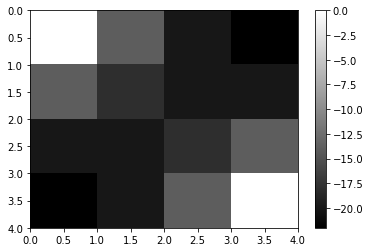

In [11]:
def plot_gridworld_value(V):
    plt.figure()
    c = plt.pcolormesh(V, cmap='gray')
    plt.colorbar(c)
    plt.gca().invert_yaxis()  # In the array, first row = 0 is on top

# Making a plot always helps
plot_gridworld_value(V.reshape(env.shape))

---
## 2. Policy Iteration (2 points)
Using the policy evaluation algorithm we can implement policy iteration to find a good policy for this problem. Note that we do not need to use a discount_factor for episodic tasks but make sure your implementation can handle this correctly!

In [12]:
%%execwritefile -a dp_autograde.py

def get_Q(state, V, env, discount_factor):
    """
    Calculate the Q for a given state
        
    Returns:
        Vector of length env.nA representing the Q values
    """
    Q = np.zeros(env.nA)
    for action in range(env.nA): 
        for trans_prob, next_state, reward, done in env.P[state][action]:
            Q[action] += trans_prob * (reward + discount_factor * V[next_state])
    return Q

def policy_iter_v(env, policy_eval_v=policy_eval_v, discount_factor=1.0):
    """
    Policy Iteration Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI envrionment.
        policy_eval_v: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
    """
    # Start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    while True:
        # YOUR CODE HERE
        plicy_stable = True
        V = policy_eval_v(policy, env)
        for s in range(policy.shape[0]):
            old_action = np.argmax(policy[s]) # with this we get the index that has max prob.
            # now let's find out the new action
            all_possible_values = []
            for a in range(policy.shape[1]):
                pi_a_s = policy[s][a]
                next_value = 0
                for state_transit in env.P[s][a]:
                    p = state_transit[0]
                    reward = state_transit[2]
                    next_state = state_transit[1]
                    next_value += p*(reward+discount_factor*V[next_state])
                all_possible_values.append(next_value)
            new_action = np.argmax(all_possible_values)
#             print("state is", s)
#             print("old action is", old_action)
#             print("new action is", new_action)
#             print("new action distribution over state is", all_possible_values)
            # we update the policy for this state to deterministic prob.
            policy[s] = np.eye(policy.shape[1])[new_action]
            if new_action != old_action:
                plicy_stable = False
                # we have found a new policy, we assign full probability to the one that is found better
                # kinda of greedy policy update
        if plicy_stable:
            break
    return policy, V

Appending to dp_autograde.py


Policy Probability Distribution:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]
^<<v
^^^v
^^>v
^>>^

Value Function:
[ 0. -1. -2. -3. -1. -2. -3. -2. -2. -3. -2. -1. -3. -2. -1.  0.]

Reshaped Grid Value Function:
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]



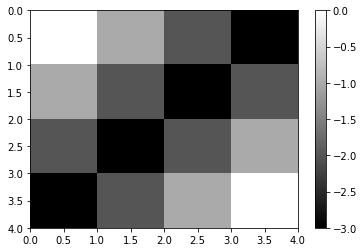

In [13]:
# Let's see what it does
policy, v = policy_iter_v(env, policy_eval_v)
print("Policy Probability Distribution:")
print(policy)
print("")

def print_grid_policy(policy, symbols=["^", ">", "v", "<"]):
    symbols = np.array(symbols)
    for row in policy:
        print("".join(symbols[row]))

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print_grid_policy(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

plot_gridworld_value(v.reshape(env.shape))

---
## 3. Q-value Iteration (3 points)
In this exercise you will implement the value iteration algorithm. However, because this algorithm is quite similar to the ones you implemented previously, we will spice things up a bit and use Q-values instead. Thus instead of using Bellman optimality equations for V you will use Bellman equations for Q. 

In [14]:
%%execwritefile -a dp_autograde.py

def value_iter_q(env, theta=0.0001, discount_factor=1.0):
    """
    Q-value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all state-action pairs.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, Q) of the optimal policy and the optimal Q-value function.        
    """
    
    # Start with an all 0 Q-value function
    Q = np.zeros((env.nS, env.nA))
    policy = np.ones([env.nS, env.nA]) / env.nA
    while True:
        # YOUR CODE HERE
        plicy_stable = True
        for s in range(policy.shape[0]):
            
            all_possible_values = []
            for a in range(policy.shape[1]):
                pi_a_s = policy[s][a]
                next_value = 0
                for state_transit in env.P[s][a]:
                    p = state_transit[0]
                    reward = state_transit[2]
                    next_state = state_transit[1]
                    next_action = np.argmax(policy[next_state])
                    next_value += p*(reward+discount_factor*Q[next_state][next_action])
                all_possible_values.append(next_value)
            Q[s] = all_possible_values

            old_action = np.argmax(policy[s]) # with this we get the index that has max prob.
            new_action = np.argmax(all_possible_values)
            policy[s] = np.eye(policy.shape[1])[new_action]
            if new_action != old_action:
                plicy_stable = False
                # we have found a new policy, we assign full probability to the one that is found better
                # kinda of greedy policy update
        if plicy_stable:
            break
    return policy, Q

Appending to dp_autograde.py


In [15]:
# Let's see what it does
policy, Q = value_iter_q(env)
print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print_grid_policy(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Q Function:")
print(Q)
print("")

Policy Probability Distribution:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):
[[0 3 3 2]
 [0 0 0 2]
 [0 0 1 2]
 [0 1 1 0]]
^<<v
^^^v
^^>v
^>>^

Q Function:
[[ 0.  0.  0.  0.]
 [-2. -3. -3. -1.]
 [-3. -4. -4. -2.]
 [-4. -4. -3. -3.]
 [-1. -3. -3. -2.]
 [-2. -4. -4. -2.]
 [-3. -3. -3. -3.]
 [-4. -3. -2. -4.]
 [-2. -4. -4. -3.]
 [-3. -3. -3. -3.]
 [-4. -2. -2. -4.]
 [-3. -2. -1. -3.]
 [-3. -3. -4. -4.]
 [-4. -2. -3. -4.]
 [-3. -1. -2. -3.]
 [ 0.  0.  0.  0.]]



In [16]:
# As you can see, the visualization of the Q function is quite clumsy and is not that easy to check 
# that all values make sense. However, you can easily create a V function from Q and policy to double
# check that the values are what you would expect.

If you want to test/submit your solution **restart the kernel, run all cells and submit the dp_autograde.py file into codegrade.**